In [42]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
import warnings

# Tắt các cảnh báo không cần thiết
warnings.filterwarnings("ignore")

# Thư viện tiền xử lý
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Các mô hình
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Các chỉ số đánh giá
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)

# Cài đặt hiển thị
# %matplotlib inline # Bỏ dòng này nếu chạy dưới dạng script
sns.set(style="whitegrid", palette="muted", font_scale=1.2)


In [44]:
df_train_full = pd.read_csv(
    r"D:\Workspace\Mon_Hoc\Mon_hoc\KPDL_TEAM\Tri_Duy_Dat\final_of_final\final_data\final_data_train.csv"
)
df_test_final = pd.read_csv(
    r"D:\Workspace\Mon_Hoc\Mon_hoc\KPDL_TEAM\Tri_Duy_Dat\final_of_final\final_data\final_data_test.csv"
)

df_train_full.head()
df_test_final.head()


,PassengerId,Pclass,Age,Fare,FamilySize,IsAlone,HasCabin,Sex_male,Embarked_Q,Embarked_S,...,Title_Rare,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U,Survived
0,1,3.0,22.0,7.2500,2.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,2,1.0,38.0,71.2833,2.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,3,3.0,26.0,7.9250,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,4,1.0,35.0,53.1000,2.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,5,3.0,35.0,8.0500,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


,PassengerId,Pclass,Age,Fare,FamilySize,IsAlone,HasCabin,Sex_male,Embarked_Q,Embarked_S,...,Title_Mrs,Title_Rare,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U
0,892,3.0,34.5,7.8292,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,893,3.0,47.0,7.0000,2.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,894,2.0,62.0,9.6875,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,895,3.0,27.0,8.6625,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,896,3.0,22.0,12.2875,3.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [45]:
# 1. ĐỊNH NGHĨA CỘT TARGET
TARGET_COLUMN = "Survived"

if TARGET_COLUMN not in df_train_full.columns:
    print(f"LỖI: Cột target '{TARGET_COLUMN}' không tìm thấy trong train_cleaned.csv")
    raise KeyError(f"Không tìm thấy cột {TARGET_COLUMN}")

# 2. Tách X và y từ tập train đầy đủ
print("Tách X và y từ tập train...")
X = df_train_full.drop(TARGET_COLUMN, axis=1)
y = df_train_full[TARGET_COLUMN]

# 3. Tách thành tập train/validation
# Chúng ta sẽ dùng 20% dữ liệu train để làm validation
print("Tách dữ liệu train/validation...")
X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y,  # stratify=y rất quan trọng để giữ tỷ lệ phân bổ của 'Survived'
)

# 4. Tập test cuối cùng (đảm bảo các cột khớp nhau)
# Giả định df_test_final có các cột features giống hệt X
# Nếu df_test_final có cột ID (ví dụ: PassengerId) mà X không có, bạn cần loại bỏ nó
# Ví dụ: X_test_final = df_test_final.drop('PassengerId', axis=1)
# Ở đây, ta giả định các cột đã khớp
X_test_final = df_test_final.copy()

# Đảm bảo thứ tự cột của X_test_final giống hệt X_train
try:
    X_test_final = X_test_final[X_train.columns]
except KeyError:
    print("LỖI: Các cột của test_cleaned.csv không khớp với train_cleaned.csv")
    print(f"Cột của Train: {X_train.columns.tolist()}")
    print(f"Cột của Test: {X_test_final.columns.tolist()}")
    raise

# 5. Chuẩn hóa (Scaling)
print("Đang chuẩn hóa dữ liệu (scaling)...")
scaler = StandardScaler()

# Chỉ fit trên X_train
X_train_scaled = scaler.fit_transform(X_train)
# Transform X_val và X_test_final
X_val_scaled = scaler.transform(X_val)
X_test_final_scaled = scaler.transform(X_test_final)

print("Chuẩn bị dữ liệu hoàn tất.")
print(f"Kích thước X_train: {X_train_scaled.shape}")
print(f"Kích thước X_val: {X_val_scaled.shape}")
print(f"Kích thước X_test_final: {X_test_final_scaled.shape}")


Tách X và y từ tập train...
Tách dữ liệu train/validation...
Đang chuẩn hóa dữ liệu (scaling)...
Chuẩn bị dữ liệu hoàn tất.
Kích thước X_train: (712, 22)
Kích thước X_val: (179, 22)
Kích thước X_test_final: (418, 22)


In [46]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Support Vector Machine": SVC(random_state=42),
    "Naive Bayes": GaussianNB(),
}

# Dictionary để lưu các mô hình đã huấn luyện
trained_models = {}


BẮT ĐẦU QUÁ TRÌNH HUẤN LUYỆN VÀ ĐÁNH GIÁ (BASELINE)...
--- 1. Đang huấn luyện: Logistic Regression ---


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


--- 2. Đang đánh giá (trên tập Validation): Logistic Regression ---
Hoàn thành trong 0.0084 giây.
Validation Accuracy: 0.8436

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       110
           1       0.81      0.78      0.79        69

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Validation Confusion Matrix - Logistic Regression')

Text(0.5, 7.249999999999995, 'Predicted')

Text(38.25, 0.5, 'Actual')

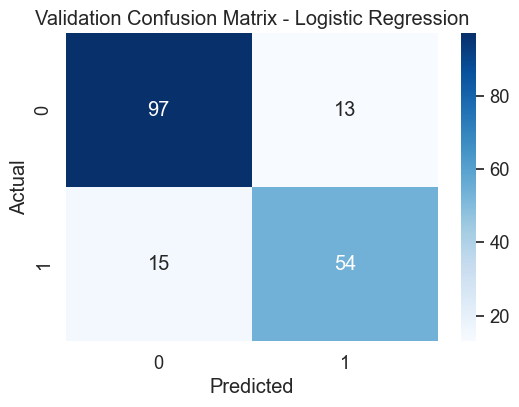

--- 1. Đang huấn luyện: Decision Tree ---


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


--- 2. Đang đánh giá (trên tập Validation): Decision Tree ---
Hoàn thành trong 0.0057 giây.
Validation Accuracy: 0.7598

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.80       110
           1       0.67      0.75      0.71        69

    accuracy                           0.76       179
   macro avg       0.75      0.76      0.75       179
weighted avg       0.77      0.76      0.76       179



<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Validation Confusion Matrix - Decision Tree')

Text(0.5, 7.249999999999995, 'Predicted')

Text(38.25, 0.5, 'Actual')

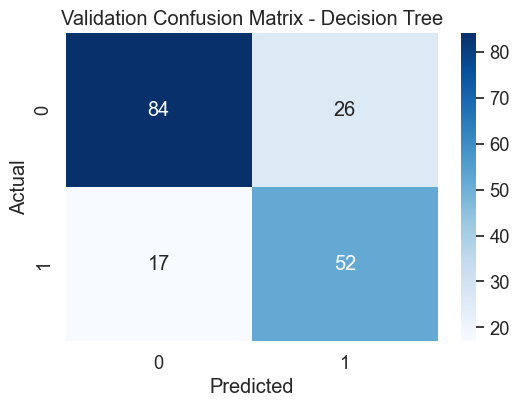

--- 1. Đang huấn luyện: Random Forest ---


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


--- 2. Đang đánh giá (trên tập Validation): Random Forest ---
Hoàn thành trong 0.0910 giây.
Validation Accuracy: 0.7821

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       110
           1       0.75      0.65      0.70        69

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.78      0.78      0.78       179



<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Validation Confusion Matrix - Random Forest')

Text(0.5, 7.249999999999995, 'Predicted')

Text(38.25, 0.5, 'Actual')

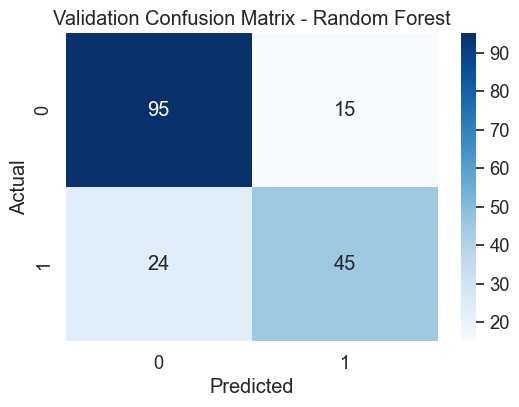

--- 1. Đang huấn luyện: Gradient Boosting ---


,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


--- 2. Đang đánh giá (trên tập Validation): Gradient Boosting ---
Hoàn thành trong 0.0943 giây.
Validation Accuracy: 0.8045

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.78      0.68      0.73        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Validation Confusion Matrix - Gradient Boosting')

Text(0.5, 7.249999999999995, 'Predicted')

Text(38.25, 0.5, 'Actual')

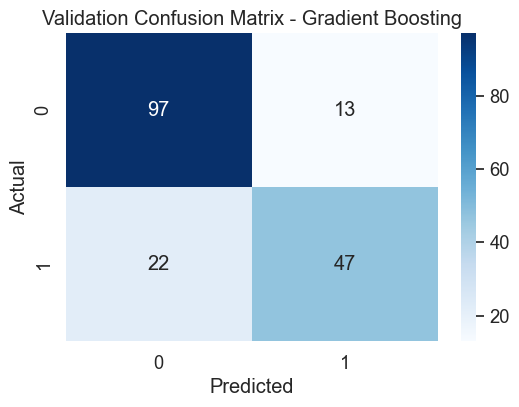

--- 1. Đang huấn luyện: KNN ---


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


--- 2. Đang đánh giá (trên tập Validation): KNN ---
Hoàn thành trong 0.0041 giây.
Validation Accuracy: 0.7989

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       110
           1       0.75      0.72      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Validation Confusion Matrix - KNN')

Text(0.5, 7.249999999999995, 'Predicted')

Text(38.25, 0.5, 'Actual')

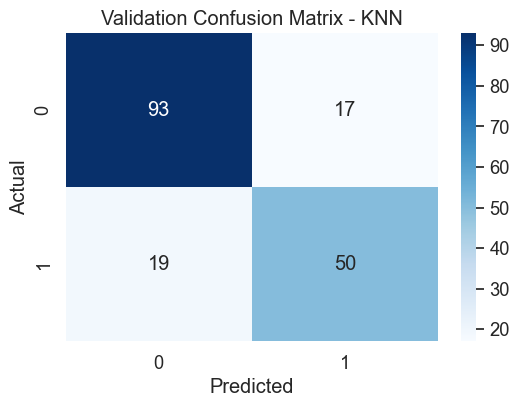

--- 1. Đang huấn luyện: Support Vector Machine ---


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


--- 2. Đang đánh giá (trên tập Validation): Support Vector Machine ---
Hoàn thành trong 0.0133 giây.
Validation Accuracy: 0.8101

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       110
           1       0.76      0.74      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Validation Confusion Matrix - Support Vector Machine')

Text(0.5, 7.249999999999995, 'Predicted')

Text(38.25, 0.5, 'Actual')

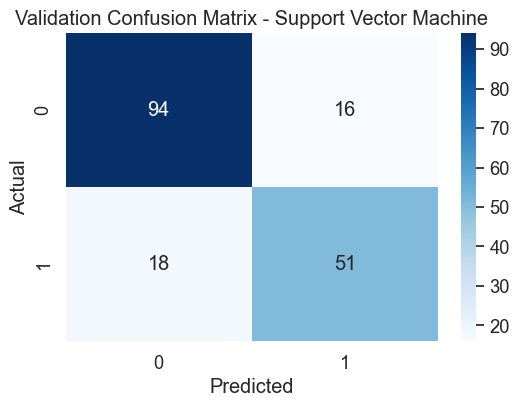

--- 1. Đang huấn luyện: Naive Bayes ---


,priors,None
,var_smoothing,1e-09


--- 2. Đang đánh giá (trên tập Validation): Naive Bayes ---
Hoàn thành trong 0.0035 giây.
Validation Accuracy: 0.6592

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.53      0.66       110
           1       0.54      0.87      0.66        69

    accuracy                           0.66       179
   macro avg       0.70      0.70      0.66       179
weighted avg       0.74      0.66      0.66       179



<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Validation Confusion Matrix - Naive Bayes')

Text(0.5, 7.249999999999995, 'Predicted')

Text(38.25, 0.5, 'Actual')

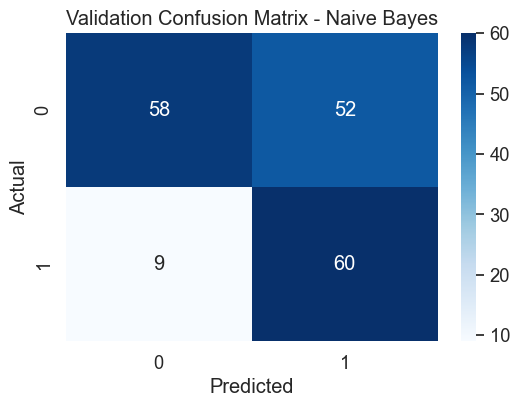

ĐÃ HOÀN TẤT ĐÁNH GIÁ TẤT CẢ CÁC MÔ HÌNH (BASELINE)!

📊 KẾT QUẢ BASELINE:
                 Model  Accuracy  Precision   Recall  F1-Score  Training Time (s)
   Logistic Regression  0.843575   0.842904 0.843575  0.843130           0.008395
         Decision Tree  0.759777   0.768073 0.759777  0.762007           0.005660
         Random Forest  0.782123   0.779693 0.782123  0.778804           0.091000
     Gradient Boosting  0.804469   0.802871 0.804469  0.801491           0.094339
                   KNN  0.798883   0.797943 0.798883  0.798310           0.004069
Support Vector Machine  0.810056   0.809183 0.810056  0.809515           0.013268
           Naive Bayes  0.659218   0.738481 0.659218  0.658303           0.003497


In [47]:
print("BẮT ĐẦU QUÁ TRÌNH HUẤN LUYỆN VÀ ĐÁNH GIÁ (BASELINE)...")
print("=" * 60)

baseline_evaluation_log = []

for name, model in models.items():
    print(f"--- 1. Đang huấn luyện: {name} ---")

    # 1. Huấn luyện mô hình
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    end_time = time.time()

    training_time = end_time - start_time

    # Lưu mô hình đã huấn luyện
    trained_models[name] = model

    # 2. Đánh giá trên tập VALIDATION
    print(f"--- 2. Đang đánh giá (trên tập Validation): {name} ---")
    y_pred_val = model.predict(X_val_scaled)

    # 3. Tính toán các chỉ số
    accuracy = accuracy_score(y_val, y_pred_val)
    precision = precision_score(y_val, y_pred_val, average="weighted")
    recall = recall_score(y_val, y_pred_val, average="weighted")
    f1 = f1_score(y_val, y_pred_val, average="weighted")

    # 4. Ghi lại kết quả (Nhật ký)
    baseline_evaluation_log.append(
        {
            "Model": name,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1,
            "Training Time (s)": training_time,
        }
    )

    # 5. In báo cáo chi tiết và Confusion Matrix
    print(f"Hoàn thành trong {training_time:.4f} giây.")
    print(f"Validation Accuracy: {accuracy:.4f}")

    print("\nValidation Classification Report:")
    print(classification_report(y_val, y_pred_val))

    # (Tùy chọn) Vẽ Confusion Matrix cho tập validation
    plt.figure(figsize=(6, 4))
    cm = confusion_matrix(y_val, y_pred_val)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Validation Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    print("=" * 60)

print("ĐÃ HOÀN TẤT ĐÁNH GIÁ TẤT CẢ CÁC MÔ HÌNH (BASELINE)!")

# Lưu kết quả baseline vào DataFrame
df_baseline = pd.DataFrame(baseline_evaluation_log)
print("\n📊 KẾT QUẢ BASELINE:")
print(df_baseline.to_string(index=False))


In [48]:
# Định nghĩa lưới siêu tham số cho từng mô hình
param_grids = {
    "Logistic Regression": {"C": [0.1, 1.0, 10.0], "solver": ["liblinear", "lbfgs"]},
    "Decision Tree": {
        "max_depth": [None, 5, 10, 20],
        "min_samples_leaf": [1, 2, 5],
        "criterion": ["gini", "entropy"],
    },
    "Random Forest": {
        "n_estimators": [100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_leaf": [1, 2],
    },
    "Gradient Boosting": {
        "n_estimators": [100, 200],
        "learning_rate": [0.01, 0.1],
        "max_depth": [3, 5],
    },
    "KNN": {
        "n_neighbors": [3, 5, 7],
        "weights": ["uniform", "distance"],
        "metric": ["minkowski", "manhattan"],
    },
    "Support Vector Machine": {
        "C": [0.1, 1.0, 10.0],
        "kernel": ["linear", "rbf"],
        "gamma": ["scale", "auto"],
    },
    "Naive Bayes": {"var_smoothing": [1e-9, 1e-8, 1e-7]},
}


BẮT ĐẦU QUÁ TRÌNH TỐI ƯU HÓA VÀ ĐÁNH GIÁ (TUNED)...
--- 1. Đang tối ưu hóa: Logistic Regression ---
Fitting 5 folds for each of 6 candidates, totalling 30 fits


,estimator,LogisticRegre...ndom_state=42)
,param_grid,"{'C': [0.1, 1.0, ...], 'solver': ['liblinear', 'lbfgs']}"
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


--- 2. Đang đánh giá (trên tập Validation): Logistic Regression ---
Hoàn thành trong 0.0595 giây.
Các tham số tốt nhất tìm được: 
{'C': 0.1, 'solver': 'liblinear'}

Validation Accuracy: 0.8045

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       110
           1       0.76      0.72      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Validation Confusion Matrix - Logistic Regression (Tuned)')

Text(0.5, 7.249999999999995, 'Predicted')

Text(38.25, 0.5, 'Actual')

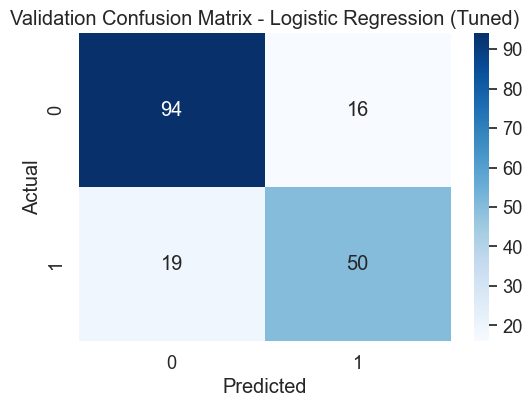

--- 1. Đang tối ưu hóa: Decision Tree ---
Fitting 5 folds for each of 24 candidates, totalling 120 fits


,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [None, 5, ...], 'min_samples_leaf': [1, 2, ...]}"
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


--- 2. Đang đánh giá (trên tập Validation): Decision Tree ---
Hoàn thành trong 0.0845 giây.
Các tham số tốt nhất tìm được: 
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5}

Validation Accuracy: 0.7877

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       110
           1       0.80      0.59      0.68        69

    accuracy                           0.79       179
   macro avg       0.79      0.75      0.76       179
weighted avg       0.79      0.79      0.78       179



<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Validation Confusion Matrix - Decision Tree (Tuned)')

Text(0.5, 7.249999999999995, 'Predicted')

Text(38.25, 0.5, 'Actual')

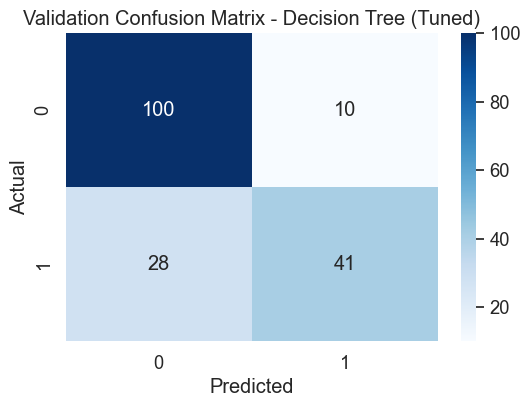

--- 1. Đang tối ưu hóa: Random Forest ---
Fitting 5 folds for each of 12 candidates, totalling 60 fits


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2], 'n_estimators': [100, 200]}"
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


--- 2. Đang đánh giá (trên tập Validation): Random Forest ---
Hoàn thành trong 1.1188 giây.
Các tham số tốt nhất tìm được: 
{'max_depth': 20, 'min_samples_leaf': 2, 'n_estimators': 200}

Validation Accuracy: 0.7765

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.86      0.83       110
           1       0.75      0.64      0.69        69

    accuracy                           0.78       179
   macro avg       0.77      0.75      0.76       179
weighted avg       0.77      0.78      0.77       179



<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Validation Confusion Matrix - Random Forest (Tuned)')

Text(0.5, 7.249999999999995, 'Predicted')

Text(38.25, 0.5, 'Actual')

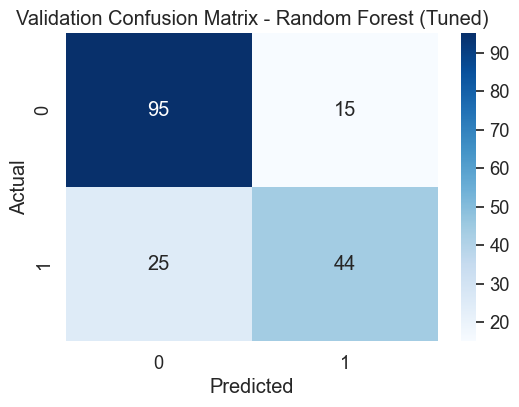

--- 1. Đang tối ưu hóa: Gradient Boosting ---
Fitting 5 folds for each of 8 candidates, totalling 40 fits


,estimator,GradientBoost...ndom_state=42)
,param_grid,"{'learning_rate': [0.01, 0.1], 'max_depth': [3, 5], 'n_estimators': [100, 200]}"
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'log_loss'


--- 2. Đang đánh giá (trên tập Validation): Gradient Boosting ---
Hoàn thành trong 1.0935 giây.
Các tham số tốt nhất tìm được: 
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}

Validation Accuracy: 0.8101

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       110
           1       0.81      0.67      0.73        69

    accuracy                           0.81       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.81      0.81       179



<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Validation Confusion Matrix - Gradient Boosting (Tuned)')

Text(0.5, 7.249999999999995, 'Predicted')

Text(38.25, 0.5, 'Actual')

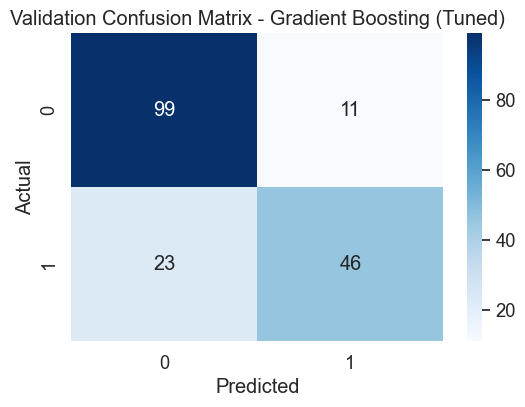

--- 1. Đang tối ưu hóa: KNN ---
Fitting 5 folds for each of 12 candidates, totalling 60 fits


,estimator,KNeighborsClassifier()
,param_grid,"{'metric': ['minkowski', 'manhattan'], 'n_neighbors': [3, 5, ...], 'weights': ['uniform', 'distance']}"
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,5


--- 2. Đang đánh giá (trên tập Validation): KNN ---
Hoàn thành trong 0.0504 giây.
Các tham số tốt nhất tìm được: 
{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

Validation Accuracy: 0.7709

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       110
           1       0.71      0.70      0.70        69

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Validation Confusion Matrix - KNN (Tuned)')

Text(0.5, 7.249999999999995, 'Predicted')

Text(38.25, 0.5, 'Actual')

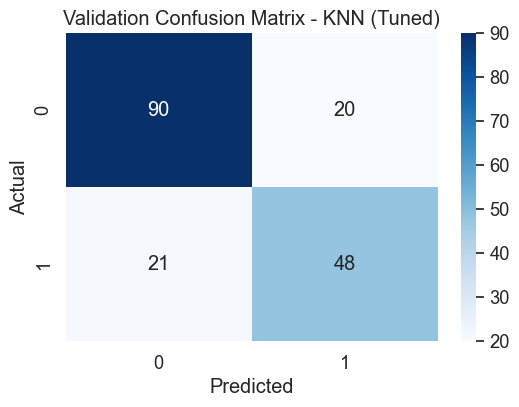

--- 1. Đang tối ưu hóa: Support Vector Machine ---
Fitting 5 folds for each of 12 candidates, totalling 60 fits


,estimator,SVC(random_state=42)
,param_grid,"{'C': [0.1, 1.0, ...], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf']}"
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,10.0


--- 2. Đang đánh giá (trên tập Validation): Support Vector Machine ---
Hoàn thành trong 0.1687 giây.
Các tham số tốt nhất tìm được: 
{'C': 10.0, 'gamma': 'scale', 'kernel': 'rbf'}

Validation Accuracy: 0.7877

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       110
           1       0.76      0.65      0.70        69

    accuracy                           0.79       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.79      0.79      0.78       179



<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Validation Confusion Matrix - Support Vector Machine (Tuned)')

Text(0.5, 7.249999999999995, 'Predicted')

Text(38.25, 0.5, 'Actual')

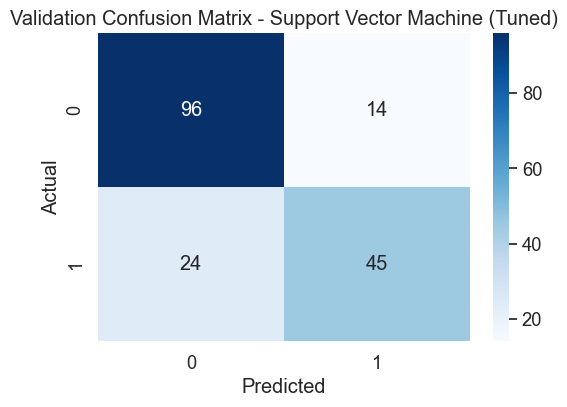

--- 1. Đang tối ưu hóa: Naive Bayes ---
Fitting 5 folds for each of 3 candidates, totalling 15 fits


,estimator,GaussianNB()
,param_grid,"{'var_smoothing': [1e-09, 1e-08, ...]}"
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,priors,None


--- 2. Đang đánh giá (trên tập Validation): Naive Bayes ---
Hoàn thành trong 0.0269 giây.
Các tham số tốt nhất tìm được: 
{'var_smoothing': 1e-07}

Validation Accuracy: 0.7430

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.67      0.76       110
           1       0.62      0.86      0.72        69

    accuracy                           0.74       179
   macro avg       0.75      0.76      0.74       179
weighted avg       0.78      0.74      0.75       179



<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Validation Confusion Matrix - Naive Bayes (Tuned)')

Text(0.5, 7.249999999999995, 'Predicted')

Text(38.25, 0.5, 'Actual')

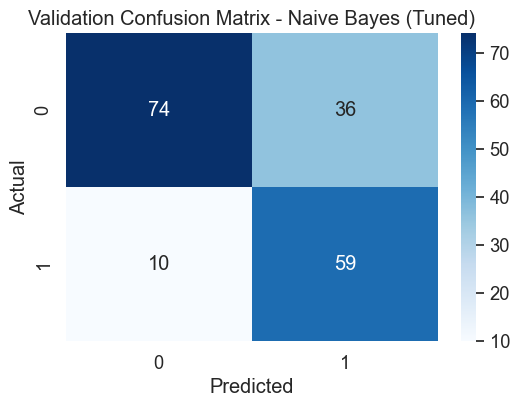

ĐÃ HOÀN TẤT TỐI ƯU HÓA VÀ ĐÁNH GIÁ TẤT CẢ CÁC MÔ HÌNH (TUNED)!

📊 KẾT QUẢ SAU TỐI ƯU HÓA:
                 Model  Accuracy  Precision   Recall  F1-Score  Best F1 (CV)  Training Time (s)
   Logistic Regression  0.804469   0.803224 0.804469  0.803612      0.817368           0.059455
         Decision Tree  0.787709   0.789989 0.787709  0.779816      0.812518           0.084472
         Random Forest  0.776536   0.773972 0.776536  0.772665      0.822653           1.118815
     Gradient Boosting  0.810056   0.809757 0.810056  0.805923      0.810558           1.093478
                   KNN  0.770950   0.770364 0.770950  0.770632      0.821043           0.050364
Support Vector Machine  0.787709   0.785626 0.787709  0.784032      0.833451           0.168694
           Naive Bayes  0.743017   0.780768 0.743017  0.746167      0.784352           0.026949


In [49]:
print("BẮT ĐẦU QUÁ TRÌNH TỐI ƯU HÓA VÀ ĐÁNH GIÁ (TUNED)...")
print("=" * 60)

tuned_evaluation_log = []

for name, model in models.items():
    print(f"--- 1. Đang tối ưu hóa: {name} ---")

    # Lấy lưới tham số cho mô hình hiện tại
    grid = param_grids[name]

    # 1. Khởi tạo GridSearchCV
    # cv=5 nghĩa là 5-fold Cross-Validation
    # scoring='f1_weighted' khớp với cách bạn tính F1-Score (average='weighted')
    # n_jobs=-1 sử dụng tất cả các lõi CPU để tăng tốc
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=grid,
        cv=5,
        scoring="f1_weighted",
        n_jobs=-1,
        verbose=1,  # Hiển thị log, đặt = 0 để tắt
    )

    # 2. Huấn luyện (GridSearch sẽ tự động làm CV)
    # Chúng ta fit trên X_train_scaled, CV sẽ tự chia nó ra
    start_time = time.time()
    grid_search.fit(X_train_scaled, y_train)
    end_time = time.time()

    training_time = end_time - start_time

    # 3. Lấy ra mô hình và kết quả tốt nhất
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_cv_score = grid_search.best_score_  # Điểm F1 tốt nhất từ cross-validation

    # Lưu mô hình TỐT NHẤT đã huấn luyện
    trained_models[name] = best_model

    # 4. Đánh giá mô hình TỐT NHẤT trên tập VALIDATION (tập dữ liệu giữ lại)
    print(f"--- 2. Đang đánh giá (trên tập Validation): {name} ---")
    y_pred_val = best_model.predict(X_val_scaled)

    # 5. Tính toán các chỉ số
    accuracy = accuracy_score(y_val, y_pred_val)
    precision = precision_score(y_val, y_pred_val, average="weighted")
    recall = recall_score(y_val, y_pred_val, average="weighted")
    f1 = f1_score(y_val, y_pred_val, average="weighted")

    # 6. Ghi lại kết quả (Nhật ký) - THÊM CẢ THAM SỐ TỐT NHẤT
    tuned_evaluation_log.append(
        {
            "Model": name,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1,
            "Best F1 (CV)": best_cv_score,
            "Training Time (s)": training_time,
            "Best Params": str(best_params),  # Lưu lại tham số tốt nhất
        }
    )

    # 7. In báo cáo chi tiết và Confusion Matrix
    print(f"Hoàn thành trong {training_time:.4f} giây.")
    print(f"Các tham số tốt nhất tìm được: \n{best_params}")
    print(f"\nValidation Accuracy: {accuracy:.4f}")

    print("\nValidation Classification Report:")
    print(classification_report(y_val, y_pred_val))

    # (Tùy chọn) Vẽ Confusion Matrix
    plt.figure(figsize=(6, 4))
    cm = confusion_matrix(y_val, y_pred_val)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Validation Confusion Matrix - {name} (Tuned)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    print("=" * 60)

print("ĐÃ HOÀN TẤT TỐI ƯU HÓA VÀ ĐÁNH GIÁ TẤT CẢ CÁC MÔ HÌNH (TUNED)!")

# Lưu kết quả tuned vào DataFrame
df_tuned = pd.DataFrame(tuned_evaluation_log)
print("\n📊 KẾT QUẢ SAU TỐI ƯU HÓA:")
print(
    df_tuned[
        [
            "Model",
            "Accuracy",
            "Precision",
            "Recall",
            "F1-Score",
            "Best F1 (CV)",
            "Training Time (s)",
        ]
    ].to_string(index=False)
)


## 📊 So Sánh Hiệu Quả Giữa Baseline và Tuned Models


In [50]:
# Tạo DataFrame so sánh tổng hợp
comparison_data = []

for baseline_row in baseline_evaluation_log:
    model_name = baseline_row["Model"]

    # Tìm kết quả tuned tương ứng
    tuned_row = next(
        (item for item in tuned_evaluation_log if item["Model"] == model_name), None
    )

    if tuned_row:
        comparison_data.append(
            {
                "Model": model_name,
                "Baseline Accuracy": baseline_row["Accuracy"],
                "Tuned Accuracy": tuned_row["Accuracy"],
                "Accuracy Improvement": tuned_row["Accuracy"]
                - baseline_row["Accuracy"],
                "Baseline F1": baseline_row["F1-Score"],
                "Tuned F1": tuned_row["F1-Score"],
                "F1 Improvement": tuned_row["F1-Score"] - baseline_row["F1-Score"],
                "Baseline Precision": baseline_row["Precision"],
                "Tuned Precision": tuned_row["Precision"],
                "Baseline Recall": baseline_row["Recall"],
                "Tuned Recall": tuned_row["Recall"],
            }
        )

df_comparison = pd.DataFrame(comparison_data)

print("\n" + "=" * 100)
print("📊 BẢNG SO SÁNH CHI TIẾT: BASELINE vs TUNED")
print("=" * 100)
print(df_comparison.to_string(index=False))

# Tính tổng cải thiện trung bình
avg_acc_improvement = df_comparison["Accuracy Improvement"].mean()
avg_f1_improvement = df_comparison["F1 Improvement"].mean()

print("\n" + "=" * 100)
print("📈 CẢI THIỆN TRUNG BÌNH:")
print(f"  • Accuracy: {avg_acc_improvement:+.4f} ({avg_acc_improvement*100:+.2f}%)")
print(f"  • F1-Score: {avg_f1_improvement:+.4f} ({avg_f1_improvement*100:+.2f}%)")
print("=" * 100)



📊 BẢNG SO SÁNH CHI TIẾT: BASELINE vs TUNED
                 Model  Baseline Accuracy  Tuned Accuracy  Accuracy Improvement  Baseline F1  Tuned F1  F1 Improvement  Baseline Precision  Tuned Precision  Baseline Recall  Tuned Recall
   Logistic Regression           0.843575        0.804469             -0.039106     0.843130  0.803612       -0.039518            0.842904         0.803224         0.843575      0.804469
         Decision Tree           0.759777        0.787709              0.027933     0.762007  0.779816        0.017808            0.768073         0.789989         0.759777      0.787709
         Random Forest           0.782123        0.776536             -0.005587     0.778804  0.772665       -0.006139            0.779693         0.773972         0.782123      0.776536
     Gradient Boosting           0.804469        0.810056              0.005587     0.801491  0.805923        0.004433            0.802871         0.809757         0.804469      0.810056
                   KN

### 📈 Biểu Đồ 1: So Sánh Accuracy


Text(-0.175, 0.8435754189944135, '0.8436')

Text(0.825, 0.7597765363128491, '0.7598')

Text(1.825, 0.7821229050279329, '0.7821')

Text(2.825, 0.8044692737430168, '0.8045')

Text(3.825, 0.7988826815642458, '0.7989')

Text(4.825, 0.8100558659217877, '0.8101')

Text(5.825, 0.659217877094972, '0.6592')

Text(0.175, 0.8044692737430168, '0.8045')

Text(1.175, 0.7877094972067039, '0.7877')

Text(2.175, 0.776536312849162, '0.7765')

Text(3.175, 0.8100558659217877, '0.8101')

Text(4.175, 0.770949720670391, '0.7709')

Text(5.175, 0.7877094972067039, '0.7877')

Text(6.175, 0.7430167597765364, '0.7430')

Text(0.5, 0, 'Models')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'So Sánh Accuracy: Baseline vs Tuned')

[Text(0, 0, 'Logistic Regression'),
 Text(1, 0, 'Decision Tree'),
 Text(2, 0, 'Random Forest'),
 Text(3, 0, 'Gradient Boosting'),
 Text(4, 0, 'KNN'),
 Text(5, 0, 'Support Vector Machine'),
 Text(6, 0, 'Naive Bayes')]

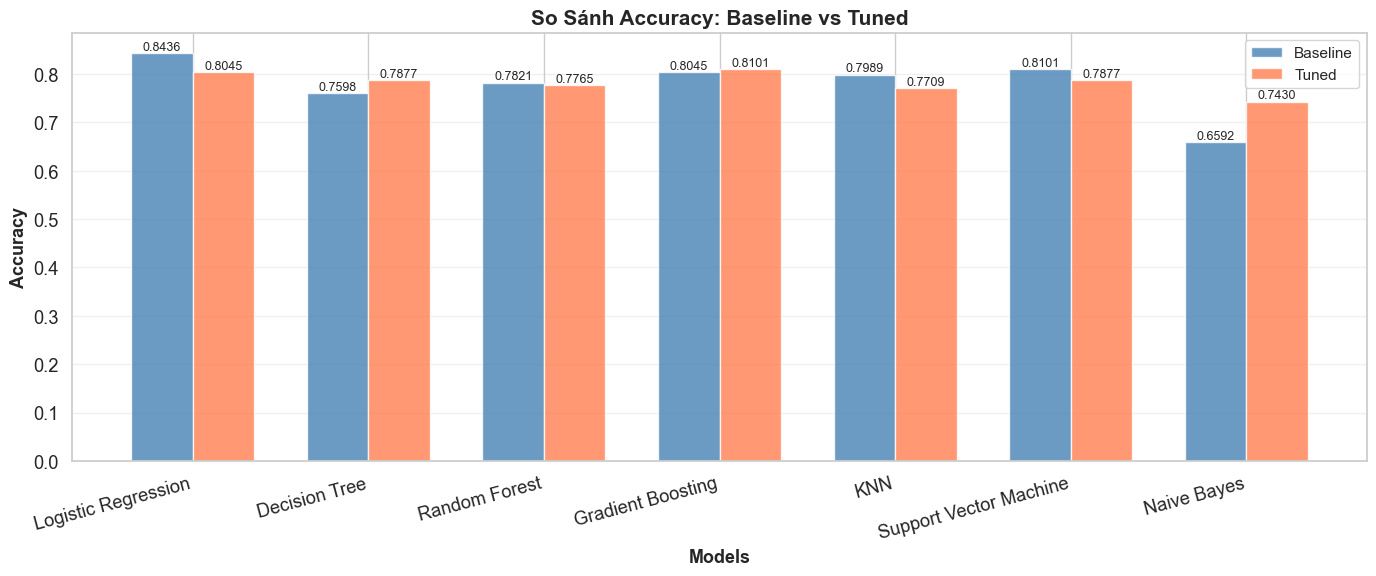

In [51]:
# Biểu đồ so sánh Accuracy: Baseline vs Tuned
fig, ax = plt.subplots(figsize=(14, 6))

models_list = df_comparison["Model"].tolist()
x = np.arange(len(models_list))
width = 0.35

bars1 = ax.bar(
    x - width / 2,
    df_comparison["Baseline Accuracy"],
    width,
    label="Baseline",
    color="steelblue",
    alpha=0.8,
)
bars2 = ax.bar(
    x + width / 2,
    df_comparison["Tuned Accuracy"],
    width,
    label="Tuned",
    color="coral",
    alpha=0.8,
)

# Thêm giá trị lên trên mỗi cột
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2.0,
            height,
            f"{height:.4f}",
            ha="center",
            va="bottom",
            fontsize=9,
        )

ax.set_xlabel("Models", fontsize=13, fontweight="bold")
ax.set_ylabel("Accuracy", fontsize=13, fontweight="bold")
ax.set_title("So Sánh Accuracy: Baseline vs Tuned", fontsize=15, fontweight="bold")
ax.set_xticks(x)
ax.set_xticklabels(models_list, rotation=15, ha="right")
ax.legend(fontsize=11)
ax.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()


### 📈 Biểu Đồ 2: So Sánh F1-Score


Text(-0.175, 0.8431298534814802, '0.8431')

Text(0.825, 0.762007066587921, '0.7620')

Text(1.825, 0.778803968880293, '0.7788')

Text(2.825, 0.801490741302827, '0.8015')

Text(3.825, 0.798309811619046, '0.7983')

Text(4.825, 0.8095148220846544, '0.8095')

Text(5.825, 0.6583030828704868, '0.6583')

Text(0.175, 0.8036119392183224, '0.8036')

Text(1.175, 0.7798155016196422, '0.7798')

Text(2.175, 0.772665168812242, '0.7727')

Text(3.175, 0.8059232554512847, '0.8059')

Text(4.175, 0.770631984047481, '0.7706')

Text(5.175, 0.7840319103716299, '0.7840')

Text(6.175, 0.7461668560704499, '0.7462')

Text(0.5, 0, 'Models')

Text(0, 0.5, 'F1-Score')

Text(0.5, 1.0, 'So Sánh F1-Score: Baseline vs Tuned')

[Text(0, 0, 'Logistic Regression'),
 Text(1, 0, 'Decision Tree'),
 Text(2, 0, 'Random Forest'),
 Text(3, 0, 'Gradient Boosting'),
 Text(4, 0, 'KNN'),
 Text(5, 0, 'Support Vector Machine'),
 Text(6, 0, 'Naive Bayes')]

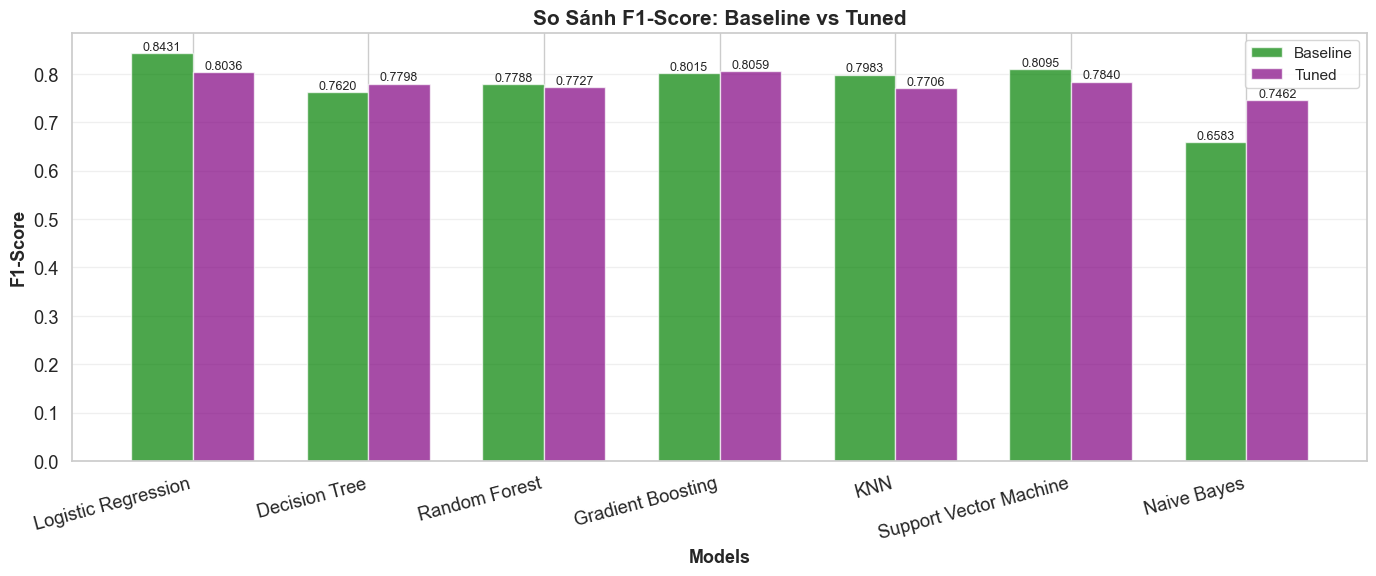

In [52]:
# Biểu đồ so sánh F1-Score: Baseline vs Tuned
fig, ax = plt.subplots(figsize=(14, 6))

x = np.arange(len(models_list))
width = 0.35

bars1 = ax.bar(
    x - width / 2,
    df_comparison["Baseline F1"],
    width,
    label="Baseline",
    color="green",
    alpha=0.7,
)
bars2 = ax.bar(
    x + width / 2,
    df_comparison["Tuned F1"],
    width,
    label="Tuned",
    color="purple",
    alpha=0.7,
)

# Thêm giá trị lên trên mỗi cột
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2.0,
            height,
            f"{height:.4f}",
            ha="center",
            va="bottom",
            fontsize=9,
        )

ax.set_xlabel("Models", fontsize=13, fontweight="bold")
ax.set_ylabel("F1-Score", fontsize=13, fontweight="bold")
ax.set_title("So Sánh F1-Score: Baseline vs Tuned", fontsize=15, fontweight="bold")
ax.set_xticks(x)
ax.set_xticklabels(models_list, rotation=15, ha="right")
ax.legend(fontsize=11)
ax.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()


### 📈 Biểu Đồ 3: Mức Độ Cải Thiện (%)


Text(-0.175, -3.9106145251396662, '-3.91%')

Text(0.825, 2.7932960893854775, '+2.79%')

Text(1.825, -0.5586592178770888, '-0.56%')

Text(2.825, 0.5586592178770888, '+0.56%')

Text(3.825, -2.7932960893854775, '-2.79%')

Text(4.825, -2.2346368715083775, '-2.23%')

Text(5.825, 8.379888268156432, '+8.38%')

Text(0.175, -3.951791426315776, '-3.95%')

Text(1.175, 1.7808435031721248, '+1.78%')

Text(2.175, -0.6138800068051009, '-0.61%')

Text(3.175, 0.4432514148457689, '+0.44%')

Text(4.175, -2.7677827571565006, '-2.77%')

Text(5.175, -2.5482911713024525, '-2.55%')

Text(6.175, 8.786377319996308, '+8.79%')

Text(0.5, 0, 'Models')

Text(0, 0.5, 'Improvement (%)')

Text(0.5, 1.0, 'Mức Độ Cải Thiện Sau Tuning (%)')

[Text(0, 0, 'Logistic Regression'),
 Text(1, 0, 'Decision Tree'),
 Text(2, 0, 'Random Forest'),
 Text(3, 0, 'Gradient Boosting'),
 Text(4, 0, 'KNN'),
 Text(5, 0, 'Support Vector Machine'),
 Text(6, 0, 'Naive Bayes')]

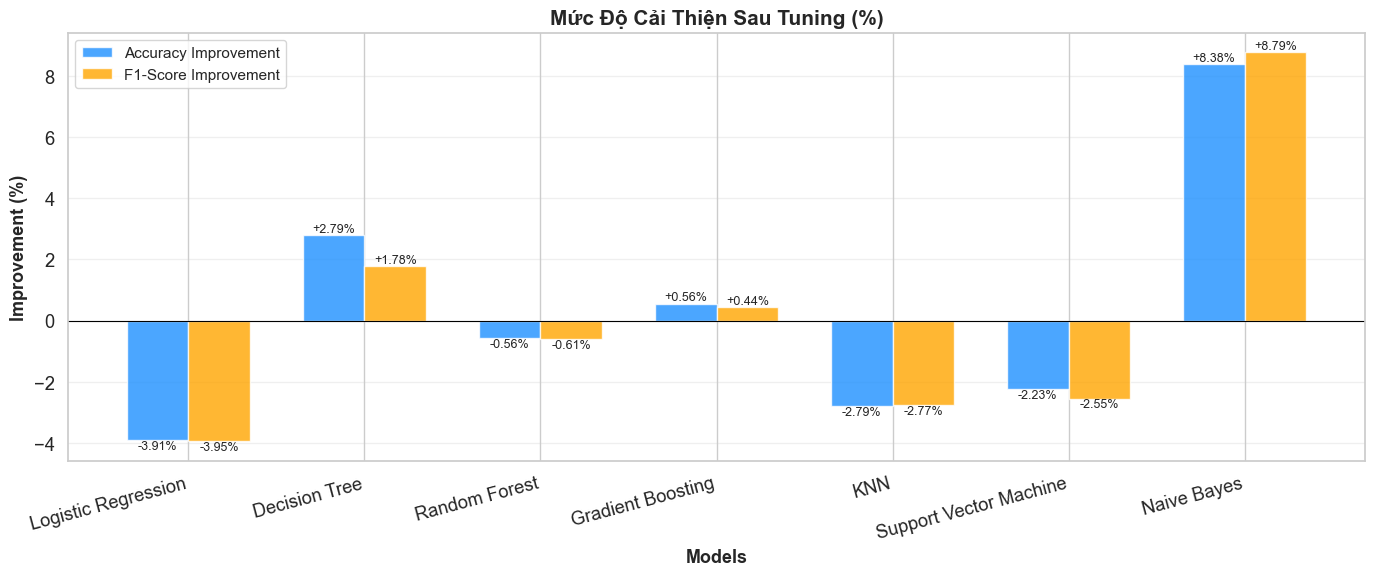

In [53]:
# Biểu đồ mức độ cải thiện (phần trăm)
fig, ax = plt.subplots(figsize=(14, 6))

x = np.arange(len(models_list))
width = 0.35

# Chuyển đổi sang phần trăm
acc_improvement_pct = df_comparison["Accuracy Improvement"] * 100
f1_improvement_pct = df_comparison["F1 Improvement"] * 100

bars1 = ax.bar(
    x - width / 2,
    acc_improvement_pct,
    width,
    label="Accuracy Improvement",
    color="dodgerblue",
    alpha=0.8,
)
bars2 = ax.bar(
    x + width / 2,
    f1_improvement_pct,
    width,
    label="F1-Score Improvement",
    color="orange",
    alpha=0.8,
)

# Thêm giá trị lên trên mỗi cột
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2.0,
            height,
            f"{height:+.2f}%",
            ha="center",
            va="bottom" if height >= 0 else "top",
            fontsize=9,
        )

ax.axhline(y=0, color="black", linestyle="-", linewidth=0.8)
ax.set_xlabel("Models", fontsize=13, fontweight="bold")
ax.set_ylabel("Improvement (%)", fontsize=13, fontweight="bold")
ax.set_title("Mức Độ Cải Thiện Sau Tuning (%)", fontsize=15, fontweight="bold")
ax.set_xticks(x)
ax.set_xticklabels(models_list, rotation=15, ha="right")
ax.legend(fontsize=11)
ax.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()


### 📈 Biểu Đồ 4: So Sánh Tất Cả Metrics (Heatmap)


<Axes: xlabel='Model'>

Text(0.5, 1.0, 'Baseline Models - All Metrics')

Text(0.5, 29.249999999999986, 'Models')

Text(188.25, 0.5, 'Metrics')

<Axes: xlabel='Model'>

Text(0.5, 1.0, 'Tuned Models - All Metrics')

Text(0.5, 29.249999999999986, 'Models')

Text(949.1590909090908, 0.5, 'Metrics')

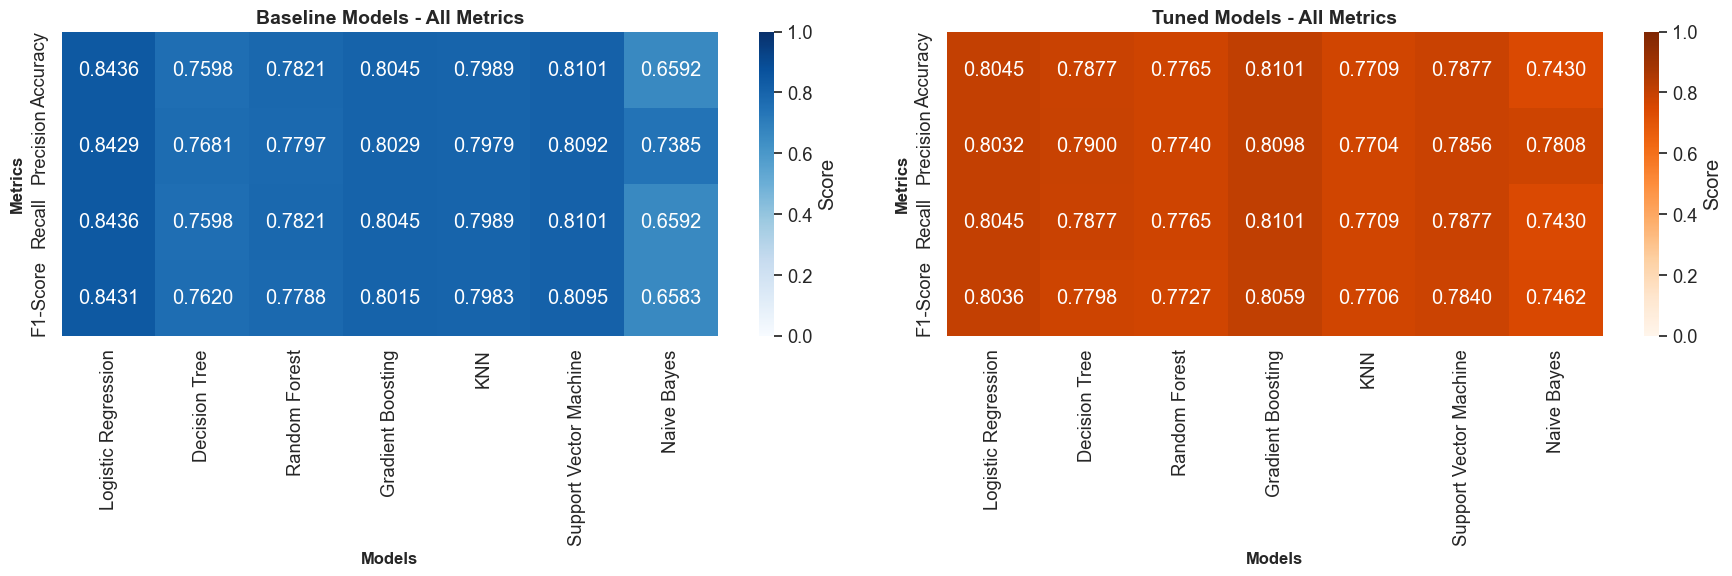

In [54]:
# Tạo heatmap để so sánh tất cả metrics
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Baseline Heatmap
baseline_metrics = df_comparison[
    [
        "Model",
        "Baseline Accuracy",
        "Baseline Precision",
        "Baseline Recall",
        "Baseline F1",
    ]
].set_index("Model")
baseline_metrics.columns = ["Accuracy", "Precision", "Recall", "F1-Score"]

sns.heatmap(
    baseline_metrics.T,
    annot=True,
    fmt=".4f",
    cmap="Blues",
    cbar_kws={"label": "Score"},
    ax=ax1,
    vmin=0,
    vmax=1,
)
ax1.set_title("Baseline Models - All Metrics", fontsize=14, fontweight="bold")
ax1.set_xlabel("Models", fontsize=12, fontweight="bold")
ax1.set_ylabel("Metrics", fontsize=12, fontweight="bold")

# Tuned Heatmap
tuned_metrics = df_comparison[
    ["Model", "Tuned Accuracy", "Tuned Precision", "Tuned Recall", "Tuned F1"]
].set_index("Model")
tuned_metrics.columns = ["Accuracy", "Precision", "Recall", "F1-Score"]

sns.heatmap(
    tuned_metrics.T,
    annot=True,
    fmt=".4f",
    cmap="Oranges",
    cbar_kws={"label": "Score"},
    ax=ax2,
    vmin=0,
    vmax=1,
)
ax2.set_title("Tuned Models - All Metrics", fontsize=14, fontweight="bold")
ax2.set_xlabel("Models", fontsize=12, fontweight="bold")
ax2.set_ylabel("Metrics", fontsize=12, fontweight="bold")

plt.tight_layout()
plt.show()


### 📈 Biểu Đồ 5: So Sánh Chi Tiết Từng Model


Text(0, 0.5, 'Score')

Text(0.5, 1.0, 'Logistic Regression')

[Text(0, 0, 'Accuracy'),
 Text(1, 0, 'Precision'),
 Text(2, 0, 'Recall'),
 Text(3, 0, 'F1')]

(0.0, 1.0)

Text(0, 0.5, 'Score')

Text(0.5, 1.0, 'Decision Tree')

[Text(0, 0, 'Accuracy'),
 Text(1, 0, 'Precision'),
 Text(2, 0, 'Recall'),
 Text(3, 0, 'F1')]

(0.0, 1.0)

Text(0, 0.5, 'Score')

Text(0.5, 1.0, 'Random Forest')

[Text(0, 0, 'Accuracy'),
 Text(1, 0, 'Precision'),
 Text(2, 0, 'Recall'),
 Text(3, 0, 'F1')]

(0.0, 1.0)

Text(0, 0.5, 'Score')

Text(0.5, 1.0, 'Gradient Boosting')

[Text(0, 0, 'Accuracy'),
 Text(1, 0, 'Precision'),
 Text(2, 0, 'Recall'),
 Text(3, 0, 'F1')]

(0.0, 1.0)

Text(0, 0.5, 'Score')

Text(0.5, 1.0, 'KNN')

[Text(0, 0, 'Accuracy'),
 Text(1, 0, 'Precision'),
 Text(2, 0, 'Recall'),
 Text(3, 0, 'F1')]

(0.0, 1.0)

Text(0, 0.5, 'Score')

Text(0.5, 1.0, 'Support Vector Machine')

[Text(0, 0, 'Accuracy'),
 Text(1, 0, 'Precision'),
 Text(2, 0, 'Recall'),
 Text(3, 0, 'F1')]

(0.0, 1.0)

Text(0, 0.5, 'Score')

Text(0.5, 1.0, 'Naive Bayes')

[Text(0, 0, 'Accuracy'),
 Text(1, 0, 'Precision'),
 Text(2, 0, 'Recall'),
 Text(3, 0, 'F1')]

(0.0, 1.0)

Text(0.5, 1.0, 'So Sánh Chi Tiết Tất Cả Metrics Cho Từng Model')

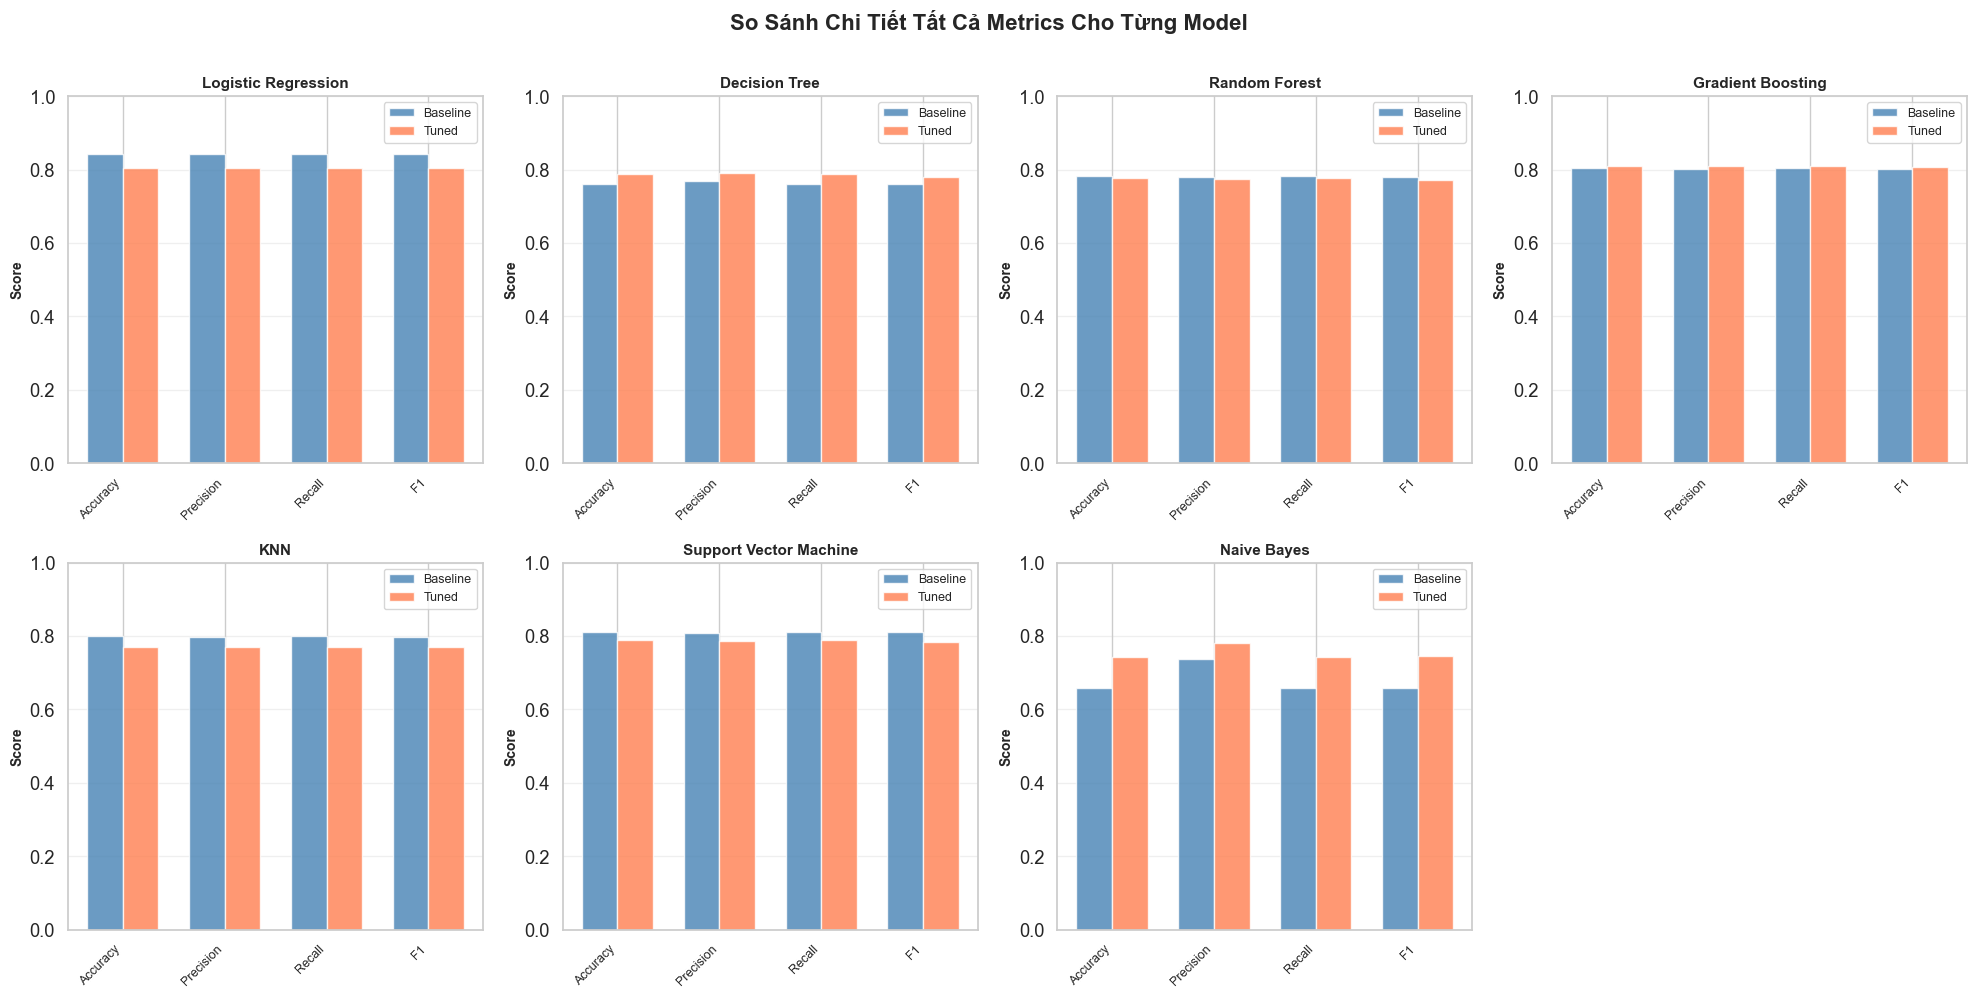

In [55]:
# So sánh chi tiết từng model với 4 metrics
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for idx, model_name in enumerate(models_list):
    if idx < len(axes):
        ax = axes[idx]

        # Lấy dữ liệu cho model này
        model_data = df_comparison[df_comparison["Model"] == model_name].iloc[0]

        metrics = ["Accuracy", "Precision", "Recall", "F1"]
        baseline_vals = [
            model_data["Baseline Accuracy"],
            model_data["Baseline Precision"],
            model_data["Baseline Recall"],
            model_data["Baseline F1"],
        ]
        tuned_vals = [
            model_data["Tuned Accuracy"],
            model_data["Tuned Precision"],
            model_data["Tuned Recall"],
            model_data["Tuned F1"],
        ]

        x_pos = np.arange(len(metrics))
        width = 0.35

        bars1 = ax.bar(
            x_pos - width / 2,
            baseline_vals,
            width,
            label="Baseline",
            color="steelblue",
            alpha=0.8,
        )
        bars2 = ax.bar(
            x_pos + width / 2,
            tuned_vals,
            width,
            label="Tuned",
            color="coral",
            alpha=0.8,
        )

        ax.set_ylabel("Score", fontsize=10, fontweight="bold")
        ax.set_title(f"{model_name}", fontsize=11, fontweight="bold")
        ax.set_xticks(x_pos)
        ax.set_xticklabels(metrics, rotation=45, ha="right", fontsize=9)
        ax.set_ylim([0, 1])
        ax.legend(fontsize=9)
        ax.grid(axis="y", alpha=0.3)

# Ẩn subplot thừa nếu có
for idx in range(len(models_list), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle(
    "So Sánh Chi Tiết Tất Cả Metrics Cho Từng Model",
    fontsize=16,
    fontweight="bold",
    y=1.00,
)
plt.tight_layout()
plt.show()


### 🏆 Tổng Kết và Model Tốt Nhất


In [56]:
# Tìm model tốt nhất
print("\n" + "=" * 100)
print("🏆 TỔNG KẾT VÀ XẾP HẠNG")
print("=" * 100)

# Sắp xếp theo Tuned F1-Score
df_sorted = df_comparison.sort_values("Tuned F1", ascending=False)

print("\n📊 XẾP HẠNG THEO F1-SCORE (SAU TUNING):")
print("-" * 100)
for idx, row in df_sorted.iterrows():
    rank = df_sorted.index.get_loc(idx) + 1
    print(
        f"{rank}. {row['Model']:30s} | F1: {row['Tuned F1']:.4f} | Accuracy: {row['Tuned Accuracy']:.4f} | Cải thiện: {row['F1 Improvement']*100:+.2f}%"
    )

# Model tốt nhất
best_model_row = df_sorted.iloc[0]
print("\n" + "=" * 100)
print(f"🥇 MODEL TỐT NHẤT: {best_model_row['Model']}")
print("=" * 100)
print(f"  📈 Metrics sau Tuning:")
print(f"     • Accuracy:  {best_model_row['Tuned Accuracy']:.4f}")
print(f"     • Precision: {best_model_row['Tuned Precision']:.4f}")
print(f"     • Recall:    {best_model_row['Tuned Recall']:.4f}")
print(f"     • F1-Score:  {best_model_row['Tuned F1']:.4f}")
print(f"\n  📊 So với Baseline:")
print(f"     • Accuracy cải thiện:  {best_model_row['Accuracy Improvement']*100:+.2f}%")
print(f"     • F1-Score cải thiện:  {best_model_row['F1 Improvement']*100:+.2f}%")

# Model cải thiện nhiều nhất
df_sorted_improvement = df_comparison.sort_values("F1 Improvement", ascending=False)
most_improved = df_sorted_improvement.iloc[0]

print("\n" + "=" * 100)
print(f"🚀 MODEL CẢI THIỆN NHIỀU NHẤT: {most_improved['Model']}")
print("=" * 100)
print(f"  • F1-Score cải thiện: {most_improved['F1 Improvement']*100:+.2f}%")
print(f"  • Accuracy cải thiện: {most_improved['Accuracy Improvement']*100:+.2f}%")
print(
    f"  • Baseline F1: {most_improved['Baseline F1']:.4f} → Tuned F1: {most_improved['Tuned F1']:.4f}"
)

print("\n" + "=" * 100)
print("✅ HOÀN TẤT TOÀN BỘ QUÁ TRÌNH TRAIN VÀ SO SÁNH!")
print("=" * 100)



🏆 TỔNG KẾT VÀ XẾP HẠNG

📊 XẾP HẠNG THEO F1-SCORE (SAU TUNING):
----------------------------------------------------------------------------------------------------
1. Gradient Boosting              | F1: 0.8059 | Accuracy: 0.8101 | Cải thiện: +0.44%
2. Logistic Regression            | F1: 0.8036 | Accuracy: 0.8045 | Cải thiện: -3.95%
3. Support Vector Machine         | F1: 0.7840 | Accuracy: 0.7877 | Cải thiện: -2.55%
4. Decision Tree                  | F1: 0.7798 | Accuracy: 0.7877 | Cải thiện: +1.78%
5. Random Forest                  | F1: 0.7727 | Accuracy: 0.7765 | Cải thiện: -0.61%
6. KNN                            | F1: 0.7706 | Accuracy: 0.7709 | Cải thiện: -2.77%
7. Naive Bayes                    | F1: 0.7462 | Accuracy: 0.7430 | Cải thiện: +8.79%

🥇 MODEL TỐT NHẤT: Gradient Boosting
  📈 Metrics sau Tuning:
     • Accuracy:  0.8101
     • Precision: 0.8098
     • Recall:    0.8101
     • F1-Score:  0.8059

  📊 So với Baseline:
     • Accuracy cải thiện:  +0.56%
     • F1-Score

## 🎯 Huấn Luyện Lại Model Tốt Nhất và Dự Đoán Trên Test Set


In [57]:
# Lấy tên model tốt nhất từ kết quả tuning
best_model_name = df_sorted.iloc[0]["Model"]
best_tuned_params = next(
    item["Best Params"]
    for item in tuned_evaluation_log
    if item["Model"] == best_model_name
)

print("=" * 100)
print(f"🎯 HUẤN LUYỆN LẠI MÔ HÌNH TỐT NHẤT: {best_model_name}")
print("=" * 100)
print(f"📋 Sử dụng các tham số tốt nhất đã tìm được từ GridSearchCV:")
print(f"   {best_tuned_params}")
print(f"\n🔄 Sử dụng 100% dữ liệu train (df_train_full) để huấn luyện lại...")
print(f"   Kích thước dữ liệu: {df_train_full.shape}")

# 1. Lấy model đã được tune tốt nhất từ trained_models
best_model_final = trained_models[best_model_name]

# 2. Chuẩn bị TOÀN BỘ dữ liệu train
# X và y đã được định nghĩa ở cell trước (từ df_train_full)
print(f"\n⚙️ Chuẩn hóa (scaling) toàn bộ dữ liệu train...")
scaler_final = StandardScaler()
X_full_scaled = scaler_final.fit_transform(X)

# 3. Huấn luyện lại trên toàn bộ dữ liệu
print(f"🚀 Bắt đầu huấn luyện lại trên toàn bộ {X_full_scaled.shape[0]} samples...")
start_time = time.time()
best_model_final.fit(X_full_scaled, y)
training_time = time.time() - start_time

print(f"✅ Huấn luyện lại hoàn tất trong {training_time:.4f} giây!")

# 4. Chuẩn bị tập test cuối cùng
print(f"\n📊 Chuẩn bị dữ liệu test cuối cùng...")
print(f"   Kích thước test: {X_test_final.shape}")
X_test_final_scaled_final = scaler_final.transform(X_test_final)

# 5. Dự đoán trên tập test cuối cùng
print(f"\n🔮 Đang dự đoán trên tập test_cleaned.csv...")
final_predictions = best_model_final.predict(X_test_final_scaled_final)

print(f"✅ Dự đoán hoàn tất!")
print(f"\n📈 Thống kê dự đoán:")
unique, counts = np.unique(final_predictions, return_counts=True)
for val, count in zip(unique, counts):
    print(f"   Class {val}: {count} samples ({count/len(final_predictions)*100:.2f}%)")

print("\n" + "=" * 100)


🎯 HUẤN LUYỆN LẠI MÔ HÌNH TỐT NHẤT: Gradient Boosting
📋 Sử dụng các tham số tốt nhất đã tìm được từ GridSearchCV:
   {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}

🔄 Sử dụng 100% dữ liệu train (df_train_full) để huấn luyện lại...
   Kích thước dữ liệu: (891, 23)

⚙️ Chuẩn hóa (scaling) toàn bộ dữ liệu train...
🚀 Bắt đầu huấn luyện lại trên toàn bộ 891 samples...


,loss,'log_loss'
,learning_rate,0.01
,n_estimators,200
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


✅ Huấn luyện lại hoàn tất trong 0.2117 giây!

📊 Chuẩn bị dữ liệu test cuối cùng...
   Kích thước test: (418, 22)

🔮 Đang dự đoán trên tập test_cleaned.csv...
✅ Dự đoán hoàn tất!

📈 Thống kê dự đoán:
   Class 0: 266 samples (63.64%)
   Class 1: 152 samples (36.36%)



### 💾 Lưu Kết Quả Dự Đoán


In [58]:
# Tạo DataFrame kết quả dự đoán
# Giả sử df_test_final có cột PassengerId (thường có trong bài toán Titanic)
# Nếu không có, chúng ta sẽ tạo index từ 0

if "PassengerId" in df_test_final.columns:
    submission_df = pd.DataFrame(
        {"PassengerId": df_test_final["PassengerId"], "Survived": final_predictions}
    )
else:
    submission_df = pd.DataFrame(
        {"Index": range(len(final_predictions)), "Survived": final_predictions}
    )

# Lưu file submission
output_filename = f'submission_{best_model_name.replace(" ", "_").lower()}_tuned.csv'
submission_df.to_csv(output_filename, index=False)

print("=" * 100)
print("💾 LƯU KẾT QUẢ Dự ĐOÁN")
print("=" * 100)
print(f"✅ Đã lưu file: {output_filename}")
print(f"\n📋 Preview 10 dự đoán đầu tiên:")
print(submission_df.head(10).to_string(index=False))
print(f"\n📊 Tổng số dự đoán: {len(submission_df)}")
print("=" * 100)


💾 LƯU KẾT QUẢ Dự ĐOÁN
✅ Đã lưu file: submission_gradient_boosting_tuned.csv

📋 Preview 10 dự đoán đầu tiên:
 PassengerId  Survived
         892         0
         893         1
         894         0
         895         0
         896         1
         897         0
         898         1
         899         0
         900         1
         901         0

📊 Tổng số dự đoán: 418


### 📊 Trực Quan Hóa Kết Quả Dự Đoán


Text(0.0, 266, '266\n(63.6%)')

Text(1.0, 152, '152\n(36.4%)')

Text(0.5, 0, 'Predicted Class')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Phân Bố Dự Đoán Trên Test Set\n(Model: Gradient Boosting)')

[Text(0, 0, 'Not Survived (0)'), Text(1, 0, 'Survived (1)')]

Text(-0.175, 549, '549')

Text(0.825, 342, '342')

Text(0.175, 266, '266')

Text(1.175, 152, '152')

Text(0.5, 0, 'Class')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'So Sánh Phân Bố: Train vs Test Predictions')

[Text(0, 0, 'Not Survived (0)'), Text(1, 0, 'Survived (1)')]

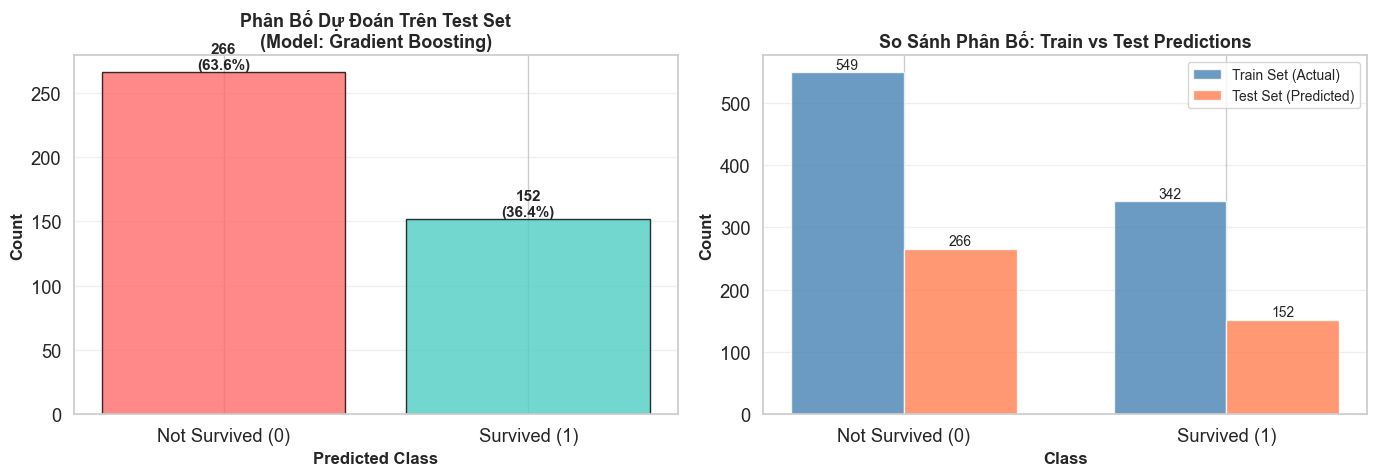


✅ Đã tạo biểu đồ trực quan hóa kết quả dự đoán!


In [59]:
# Biểu đồ phân bố dự đoán trên test set
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Biểu đồ 1: Phân bố dự đoán test set
ax1 = axes[0]
pred_counts = pd.Series(final_predictions).value_counts().sort_index()
colors = ["#FF6B6B", "#4ECDC4"]
bars = ax1.bar(
    pred_counts.index, pred_counts.values, color=colors, alpha=0.8, edgecolor="black"
)

for bar in bars:
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f"{int(height)}\n({height/len(final_predictions)*100:.1f}%)",
        ha="center",
        va="bottom",
        fontsize=11,
        fontweight="bold",
    )

ax1.set_xlabel("Predicted Class", fontsize=12, fontweight="bold")
ax1.set_ylabel("Count", fontsize=12, fontweight="bold")
ax1.set_title(
    f"Phân Bố Dự Đoán Trên Test Set\n(Model: {best_model_name})",
    fontsize=13,
    fontweight="bold",
)
ax1.set_xticks([0, 1])
ax1.set_xticklabels(["Not Survived (0)", "Survived (1)"])
ax1.grid(axis="y", alpha=0.3)

# Biểu đồ 2: So sánh phân bố train vs test prediction
ax2 = axes[1]
train_counts = y.value_counts().sort_index()

x = np.arange(2)
width = 0.35

bars1 = ax2.bar(
    x - width / 2,
    train_counts.values,
    width,
    label="Train Set (Actual)",
    color="steelblue",
    alpha=0.8,
)
bars2 = ax2.bar(
    x + width / 2,
    pred_counts.values,
    width,
    label="Test Set (Predicted)",
    color="coral",
    alpha=0.8,
)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(
            bar.get_x() + bar.get_width() / 2.0,
            height,
            f"{int(height)}",
            ha="center",
            va="bottom",
            fontsize=10,
        )

ax2.set_xlabel("Class", fontsize=12, fontweight="bold")
ax2.set_ylabel("Count", fontsize=12, fontweight="bold")
ax2.set_title(
    "So Sánh Phân Bố: Train vs Test Predictions", fontsize=13, fontweight="bold"
)
ax2.set_xticks(x)
ax2.set_xticklabels(["Not Survived (0)", "Survived (1)"])
ax2.legend(fontsize=10)
ax2.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Đã tạo biểu đồ trực quan hóa kết quả dự đoán!")


### 🎉 Tổng Kết Cuối Cùng


In [60]:
print("\n" + "=" * 120)
print(" " * 40 + "🎉 TỔNG KẾT TOÀN BỘ QUÁ TRÌNH 🎉")
print("=" * 120)

print("\n📋 CÁC BƯỚC ĐÃ THỰC HIỆN:")
print("   1️⃣  Load và chuẩn bị dữ liệu từ final_data")
print("   2️⃣  Chia dữ liệu train/validation (80/20) với stratification")
print("   3️⃣  Chuẩn hóa (scaling) dữ liệu với StandardScaler")
print("   4️⃣  Huấn luyện 7 models với cấu hình mặc định (Baseline)")
print("   5️⃣  Tối ưu hóa siêu tham số với GridSearchCV (5-fold CV)")
print("   6️⃣  So sánh hiệu quả Baseline vs Tuned với 5 biểu đồ chi tiết")
print("   7️⃣  Chọn model tốt nhất và huấn luyện lại trên 100% dữ liệu train")
print("   8️⃣  Dự đoán trên tập test cuối cùng và lưu kết quả")

print("\n" + "=" * 120)
print("🏆 KẾT QUẢ CUỐI CÙNG:")
print("=" * 120)
print(f"✨ Model được chọn:          {best_model_name}")
print(f"📊 Validation Accuracy:      {best_model_row['Tuned Accuracy']:.4f}")
print(f"📊 Validation F1-Score:      {best_model_row['Tuned F1']:.4f}")
print(f"📊 Validation Precision:     {best_model_row['Tuned Precision']:.4f}")
print(f"📊 Validation Recall:        {best_model_row['Tuned Recall']:.4f}")
print(f"\n📈 Cải thiện so với Baseline:")
print(f"   • Accuracy:  {best_model_row['Accuracy Improvement']*100:+.2f}%")
print(f"   • F1-Score:  {best_model_row['F1 Improvement']*100:+.2f}%")

print(f"\n💾 File kết quả:             {output_filename}")
print(f"📝 Tổng số dự đoán:          {len(final_predictions)} samples")

# Tính tỷ lệ sống sót dự đoán
survival_rate = (final_predictions == 1).sum() / len(final_predictions) * 100
print(f"🚢 Tỷ lệ sống sót dự đoán:   {survival_rate:.2f}%")

print("\n" + "=" * 120)
print("✅ HOÀN TẤT TOÀN BỘ QUÁ TRÌNH MACHINE LEARNING PIPELINE!")
print("=" * 120)

# Lưu tổng kết vào file text
summary_text = f"""
{'='*100}
TỔNG KẾT QUÁ TRÌNH MACHINE LEARNING - TITANIC SURVIVAL PREDICTION
{'='*100}

1. DATASET:
   - Train samples: {df_train_full.shape[0]}
   - Test samples:  {df_test_final.shape[0]}
   - Features:      {df_train_full.shape[1] - 1}

2. MODELS EVALUATED:
   {', '.join([m for m in models.keys()])}

3. BEST MODEL:
   - Model:             {best_model_name}
   - Best Parameters:   {best_tuned_params}
   - Validation Metrics:
     * Accuracy:        {best_model_row['Tuned Accuracy']:.4f}
     * Precision:       {best_model_row['Tuned Precision']:.4f}
     * Recall:          {best_model_row['Tuned Recall']:.4f}
     * F1-Score:        {best_model_row['Tuned F1']:.4f}

4. IMPROVEMENTS:
   - Accuracy Improvement:  {best_model_row['Accuracy Improvement']*100:+.2f}%
   - F1-Score Improvement:  {best_model_row['F1 Improvement']*100:+.2f}%

5. FINAL PREDICTIONS:
   - Output file:           {output_filename}
   - Total predictions:     {len(final_predictions)}
   - Predicted survival:    {(final_predictions == 1).sum()} ({survival_rate:.2f}%)
   - Predicted death:       {(final_predictions == 0).sum()} ({100-survival_rate:.2f}%)

{'='*100}
Completed at: {time.strftime('%Y-%m-%d %H:%M:%S')}
{'='*100}
"""

with open("model_training_summary.txt", "w", encoding="utf-8") as f:
    f.write(summary_text)

print("\n💾 Đã lưu tổng kết chi tiết vào file: model_training_summary.txt")



                                        🎉 TỔNG KẾT TOÀN BỘ QUÁ TRÌNH 🎉

📋 CÁC BƯỚC ĐÃ THỰC HIỆN:
   1️⃣  Load và chuẩn bị dữ liệu từ final_data
   2️⃣  Chia dữ liệu train/validation (80/20) với stratification
   3️⃣  Chuẩn hóa (scaling) dữ liệu với StandardScaler
   4️⃣  Huấn luyện 7 models với cấu hình mặc định (Baseline)
   5️⃣  Tối ưu hóa siêu tham số với GridSearchCV (5-fold CV)
   6️⃣  So sánh hiệu quả Baseline vs Tuned với 5 biểu đồ chi tiết
   7️⃣  Chọn model tốt nhất và huấn luyện lại trên 100% dữ liệu train
   8️⃣  Dự đoán trên tập test cuối cùng và lưu kết quả

🏆 KẾT QUẢ CUỐI CÙNG:
✨ Model được chọn:          Gradient Boosting
📊 Validation Accuracy:      0.8101
📊 Validation F1-Score:      0.8059
📊 Validation Precision:     0.8098
📊 Validation Recall:        0.8101

📈 Cải thiện so với Baseline:
   • Accuracy:  +0.56%
   • F1-Score:  +0.44%

💾 File kết quả:             submission_gradient_boosting_tuned.csv
📝 Tổng số dự đoán:          418 samples
🚢 Tỷ lệ sống sót dự đoán:   36

1310


💾 Đã lưu tổng kết chi tiết vào file: model_training_summary.txt
